<a href="https://colab.research.google.com/github/caromsa/neumonia_identificationxrays_cnn/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1. Estadística no paramétrica.

Nombre: Carolina Mateos Salmón

In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Ejercicio 1

Los siguientes precios de casas en Houston, TX (en miles de dólares) fueron extraídos de zillow\.com en agosto de 2019:

$$162\quad 165\quad 167\quad 188\quad 189\quad 194\quad 200\quad 233\quad 236\quad 247\\
248\quad 257\quad 258\quad 286\quad 290\quad 307\quad 330\quad 345\quad 377\quad 389\\
459\quad 460\quad 513\quad 569\quad 1399$$

Tratando estas 25 casas como una muestra aleatoria de todas las viviendas disponibles en Houston, calcula un intervalo al 90% para la verdadera mediana del precio de las casas en esa ciudad. Aplicar la prueba de los signos para probar la hipótesis que la verdadera mediana excede los $197,000.


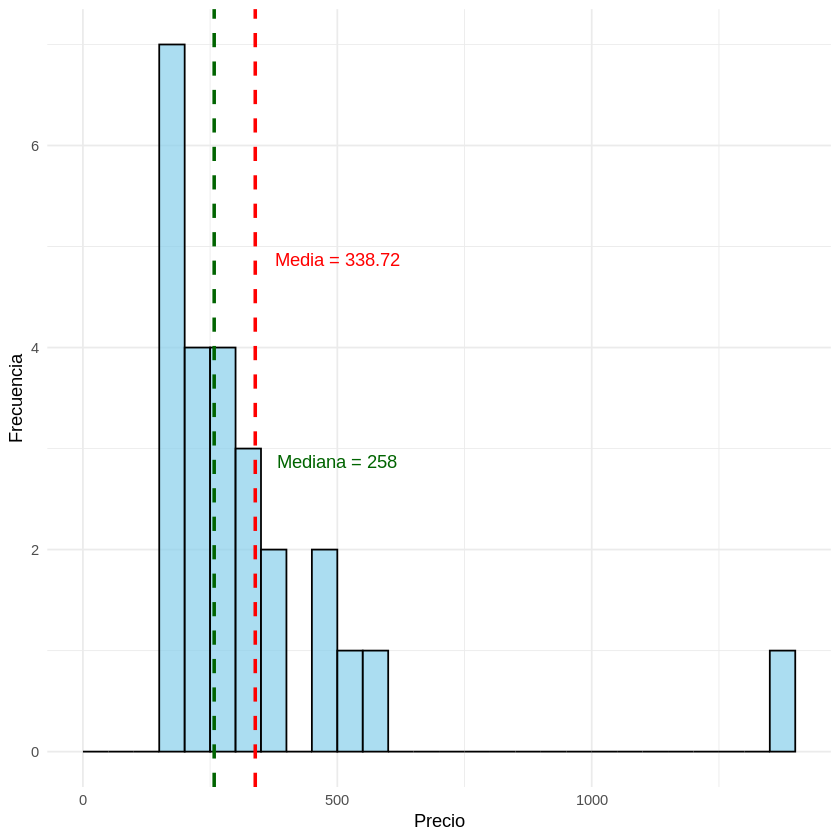

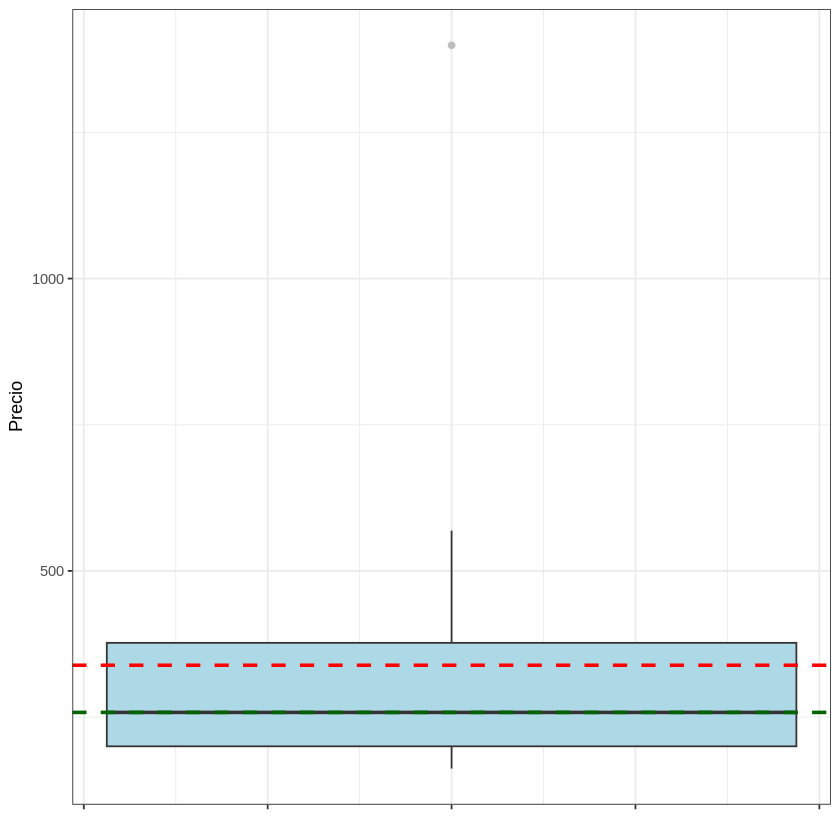

In [3]:
datos <- c(162, 165, 167, 188, 189, 194, 200, 233, 236, 247, 248, 257, 258, 286, 290, 307, 330, 345, 377, 389, 459, 460, 513, 569, 1399)

df <- data.frame(valor = datos)

media <- mean(df$valor)
mediana <- median(df$valor)

ggplot(df) +
  geom_histogram(aes(x = valor), breaks = seq(0, max(df$valor) + 50, by = 50),
                 fill = "skyblue", color = "black", alpha = 0.7) +
  geom_vline(xintercept = media, color = "red", linetype = "dashed", linewidth = 1) +
  geom_vline(xintercept = mediana, color = "darkgreen", linetype = "dashed", linewidth = 1) +
  annotate(geom = "text", x = 500, y = 5, label = paste0("Media = ", round(media, 2)), color = "red", vjust = 1.5)+
  annotate(geom = "text", x = 500, y = 3, label = paste0("Mediana = ", round(mediana, 2)), color = "darkgreen", vjust = 1.5)+
  labs(x = "Precio", y = "Frecuencia") +
  theme_minimal()

ggplot(df, aes(y = valor)) +
  geom_boxplot(fill = "lightblue", outlier.color = "gray") +
  geom_hline(yintercept = media, color = "red", linetype = "dashed", linewidth = 1) +
  geom_hline(yintercept = mediana, color = "darkgreen", linetype = "dashed", linewidth = 1) +
  #annotate(geom = "text", x = 0.15, y = 500, label = paste0("Media = ", round(media, 2)), color = "red", vjust = 1.5)+
  #annotate(geom = "text", x = 0.15, y = 375, label = paste0("Mediana = ", round(mediana, 2)), color = "darkgreen", vjust = 1.5)+
  labs(y = "Precio", x="") +
  theme_bw()+
  theme(
    axis.text.x = element_blank()
  )


#hist_graf
#box_graf

## Ejercicio 2

Los siguientes datos sobre la fuerza de agarre (en N) para 42 individuos fueron leídos de un gráfico en el artículo "Investigation of Grip Force, Normal Force, Contact Area, Hand Size, and Handle Size for Cylindrical Handles" (Human Factors 2008: 734--744):

$$
16\quad 18\quad 20\quad 26\quad 33\quad 41\quad 54\quad 56\quad 66\\
68\quad 87\quad 91\quad 95\quad 98\quad 106\quad 109\quad 111\quad 118\\
127\quad 131\quad 135\quad 145\quad 147\quad 149\quad 151\quad 168\quad 172\\
183\quad 189\quad 190\quad 200\quad 210\quad 220\quad 229\quad 230\\
233\quad 238\quad 244\quad 259\quad 294\quad 329\quad 403
$$

**a)** ¿Qué sugieren estos datos sobre la distribución poblacional de la fuerza de agarre? ¿Por qué podría ser la mediana una medida más apropiada de la fuerza de agarre "típica" que la media?

**b)** Prueba la hipótesis de que la mediana poblacional de la fuerza de agarre es menor que 170 N utilizando la prueba de los signos.


## Ejercicio 3

Considera los siguientes datos sobre el gasto energético en reposo (REE, en calorías por día) para ocho sujetos tanto con una dieta de ayuno intermitente como con una dieta estándar ("El ayuno intermitente no afecta la glucosa, los lípidos ni el metabolismo proteico corporal total", *Amer. J. of Clinical Nutr.* 2009: 1244--1251):

In [ ]:
REE_ayuno<- c(1753.7, 1604.4, 1576.5, 1279.7, 1754.2,  1695.5, 1700.1, 1717.0)
REE_estandar<- c(1755.0, 1691.1, 1697.1, 1477.7, 1785.2, 1669.7, 1901.3, 1735.3)
df<- tibble(Ayuno = REE_ayuno, Estandar = REE_estandar)
df

Ayuno,Estandar
<dbl>,<dbl>
1753.7,1755.0
1604.4,1691.1
1576.5,1697.1
1279.7,1477.7
1754.2,1785.2
1695.5,1669.7
1700.1,1901.3
1717.0,1735.3


Sea $\tilde{\mu}_D$ la verdadera mediana de la diferencia en REE (dieta de ayuno menos dieta estándar). Pruebe las hipótesis:

$$
H_0\!: \tilde{\mu}_D = 0 \quad \quad \quad H_a\!: \tilde{\mu}_D < 0
$$

utilizando la prueba de los signos.

## Ejercicio 4

Un productor de cereales para desayuno desea verificar si una máquina llenadora está funcionando correctamente. Se supone que la máquina debe llenar cajas de una libra con un promedio de 460 g. Esto es ligeramente superior a los 453.6 g requeridos para una libra exacta.

Cuando se pesan las cajas llenadas, se encuentra que 15 cajas presentan las siguientes mediciones:

454.4,	470.8,	447.5,	453.2,	462.6,	445.0,	455.9,	458.2,
461.6,	457.3,	452.0,	464.3,	459.2,	453.5,	465.8

¿Proporcionan estos datos evidencia estadística convincente de que el peso medio real difiere de 460 g?

## Ejercicio 5

Una muestra de 12 detectores de radón de cierto tipo fue seleccionada, y cada uno fue expuesto a 100 pCi/L de radón. Las lecturas resultantes fueron las siguientes:

$$105.6\quad 90.9\quad 91.2\quad 96.9\quad 96.5\quad 91.3\\
100.1\quad 105.0\quad 99.6\quad 107.7\quad 103.3\quad 92.4
$$

¿Sugieren estos datos que la media poblacional bajo estas condiciones difiere de 100? Establezca y pruebe las hipótesis apropiadas utilizando $\alpha = 0.05$. Llevar cabo la prueba de suma de rangos con signos de Wilcoxon paso a paso y comparar los resultados con el respectivo t test.





## Ejercicio 6

Las siguientes mediciones de pH en un sitio propuesto de captación de agua aparecen en el informe de 2011 "Sacramento River Water Quality Assessment for the Davis-Woodland Water Supply Project":

$$
7.20\quad 7.24\quad 7.31\quad 7.38\quad 7.45\quad 7.60\quad 7.86
$$

Use la prueba de Wilcoxon de rangos con signo para determinar si el verdadero nivel medio de pH en este sitio excede 7.3 con un nivel de significancia de 0.05.

## Ejercicio 7

Se seleccionó una muestra aleatoria de 15 mecánicos automotrices certificados para trabajar en cierto tipo de vehículo, y se determinó el tiempo (en minutos) necesario para que cada uno diagnosticara un problema particular, resultando en los siguientes datos:

$$
30.6\quad 30.1\quad 15.6\quad 26.7\quad 27.1\quad 25.4\quad 35.0\quad 30.8\\
31.9\quad 53.2\quad 12.5\quad 23.2\quad 8.8\quad 24.9\quad 30.2
$$

Use la prueba de Wilcoxon con un nivel de significancia de 0.10 para decidir si los datos sugieren que el tiempo medio verdadero de diagnóstico es menor que 30 minutos.

## Ejercicio 8

Tanto un método gravimétrico como un método espectrofotométrico están bajo consideración para determinar el contenido de fosfato de un material en particular. Se obtienen doce muestras del material, cada una se divide por la mitad, y se realiza una determinación en cada mitad usando uno de los dos métodos, resultando en los siguientes datos:


In [ ]:
Grav_data <- c(54.7, 58.5, 66.8, 46.1, 52.3, 74.3, 92.5, 40.2, 87.3, 74.8, 63.2, 68.5)
Spec_data <- c(55.0, 55.7, 62.9, 45.5, 51.1, 75.4, 89.6, 38.4, 86.8, 72.5, 62.3, 66.0)
df<- tibble(Grav = Grav_data, Spec_data)
df

Grav,Spec_data
<dbl>,<dbl>
54.7,55.0
58.5,55.7
66.8,62.9
46.1,45.5
52.3,51.1
74.3,75.4
92.5,89.6
40.2,38.4
87.3,86.8


Use la prueba de Wilcoxon de rangos con signo para comparar ambos métodos y determine si existe una diferencia significativa en las mediciones.

## Ejercicio 9

Reconsidera los datos de quema de calorías del Ejercicio 3.

a. Utiliza el procedimiento de Wilcoxon de rangos con signo para probar:

$$
H_0\!: \mu_D = 0 \quad \text{versus} \quad H_a\!: \mu_D < 0
$$

para la población de diferencias de REE (dieta de ayuno intermitente menos dieta estándar). ¿Qué suposición se requiere aquí que no era necesaria para la prueba de los signos?

b. Aplica ahora la prueba t pareada a las hipótesis del inciso (a). ¿Qué suposiciones adicionales se requieren?

c. Compara los resultados de las tres pruebas (signos, rangos con signo, y t pareada).


## Ejercicio 10

La siguiente tabla muestra las calificaciones de un grupo de 15 estudiantes en matemáticas y artes.

In [ ]:
Math_data <- c(22, 37, 36, 38, 42, 58, 58, 60, 62, 65, 66, 56, 66, 67, 62)
Artes_data <- c(53, 68, 42, 49, 51, 65, 51, 71, 55, 74, 68, 64, 67, 73, 65)
df <- tibble(Matematicas = Math_data, Artes= Artes_data)
df

Matematicas,Artes
<dbl>,<dbl>
22,53
37,68
36,42
38,49
42,51
58,65
58,51
60,71
62,55


a. Usa la prueba de rangos con signo de Wilcoxon para determinar si las localizaciones de las distribuciones de calificaciones para estos estudiantes difieren de manera importante para las dos materias. Establecer límites para el valor p e indica la conclusión apropiada cuando $\alpha = 0.05$

b. Expresa las hipótesis nula y alternativa para la prueba que se realizó en el inciso a.